In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as data
import matplotlib.pyplot as plt
import datetime

In [2]:
import yfinance as yf

start = '2010-01-01'
end = '2019-12-31'


df = yf.download('AAPL', start=start, end=end)


[*********************100%%**********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487533,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498749,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425997,447610800


In [4]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487533,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498749,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425997,447610800


In [5]:
df.drop(['Date','Adj Close'], axis=1,inplace=True)

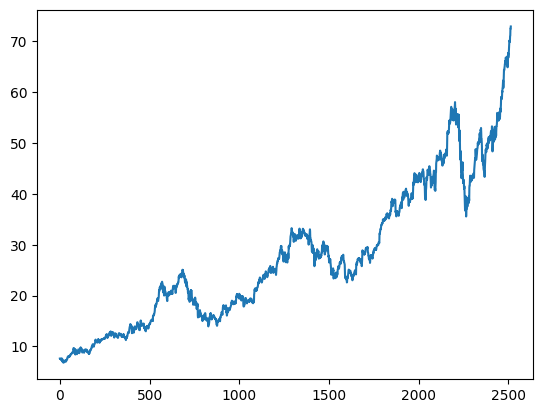

In [6]:
plt.plot(df['Close'])

In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

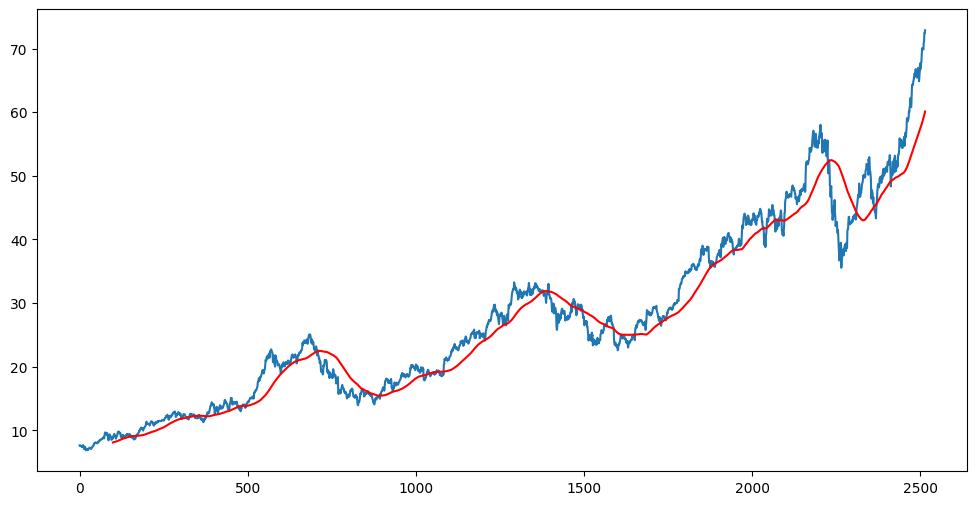

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ma100, 'r')

In [9]:
ma200 = df.Close.rolling(100).mean()


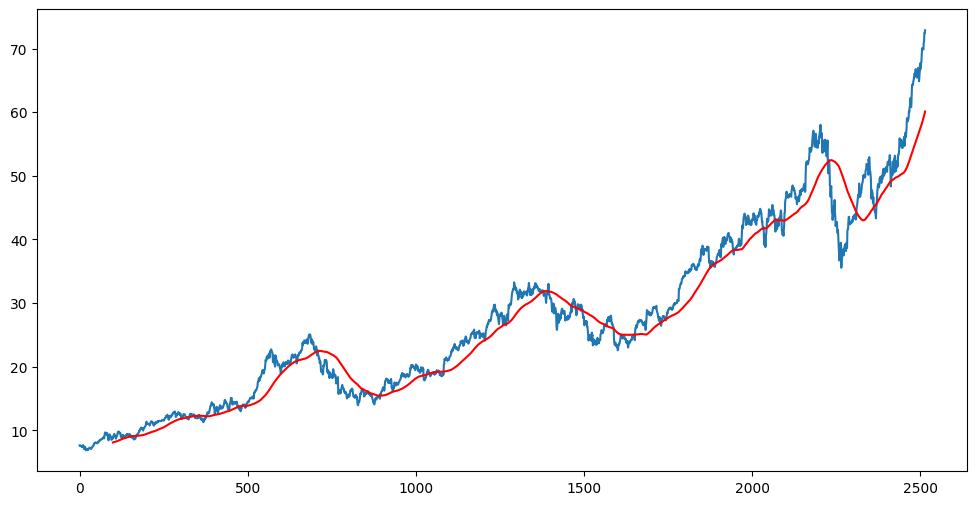

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ma200, 'r')

In [11]:
df.shape

(2515, 5)

In [12]:
#splitting data into training and testing 

In [13]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [14]:
data_training.shape,data_testing.shape

((1760, 1), (755, 1))

In [15]:
data_training.head(),data_testing.head()

(      Close
 0  7.643214
 1  7.656429
 2  7.534643
 3  7.520714
 4  7.570714,
           Close
 1760  29.182501
 1761  28.955000
 1762  29.037500
 1763  29.004999
 1764  29.152500)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [19]:
x_train = []
y_train = []

In [20]:
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train), np.array(y_train)

In [21]:
x_train.shape,y_train.shape

((1660, 100, 1), (1660,))

In [23]:
x_train[0]

array([[2.97178191e-02],
       [3.02185410e-02],
       [2.56038878e-02],
       [2.50760817e-02],
       [2.69706691e-02],
       [2.44400837e-02],
       [2.12057268e-02],
       [2.51708129e-02],
       [2.35198380e-02],
       [1.87833875e-02],
       [3.11116846e-02],
       [2.66323796e-02],
       [2.16793646e-02],
       [7.71362572e-03],
       [1.49130326e-02],
       [1.87969205e-02],
       [2.14222733e-02],
       [9.79765742e-03],
       [1.35149573e-05],
       [3.62674239e-03],
       [5.15593812e-03],
       [9.71645927e-03],
       [0.00000000e+00],
       [4.61461711e-03],
       [2.80124591e-03],
       [5.60252796e-03],
       [4.15451231e-03],
       [8.95862792e-03],
       [1.12727391e-02],
       [1.53596224e-02],
       [1.42093514e-02],
       [1.47235702e-02],
       [1.30184452e-02],
       [1.13268532e-02],
       [6.77986503e-03],
       [1.16516638e-02],
       [1.34650350e-02],
       [1.70105973e-02],
       [2.29244210e-02],
       [2.27349587e-02],


In [24]:
#ml model 

In [25]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [26]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60,activation = 'relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80,activation = 'relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))


In [27]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [29]:
model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
52/52 [==============================] - 15s 196ms/step - loss: 0.0669
Epoch 2/100
52/52 [==============================] - 10s 195ms/step - loss: 0.0133
Epoch 3/100
52/52 [==============================] - 10s 186ms/step - loss: 0.0108
Epoch 4/100
52/52 [==============================] - 10s 198ms/step - loss: 0.0103
Epoch 5/100
52/52 [==============================] - 11s 209ms/step - loss: 0.0094
Epoch 6/100
52/52 [==============================] - 10s 183ms/step - loss: 0.0077
Epoch 7/100
52/52 [==============================] - 9s 182ms/step - loss: 0.0093
Epoch 8/100
52/52 [==============================] - 10s 187ms/step - loss: 0.0082
Epoch 9/100
52/52 [==============================] - 9s 178ms/step - loss: 0.0073
Epoch 10/100
52/52 [==============================] - 9s 176ms/step - loss: 0.0079
Epoch 11/100
52/52 [==============================] - 10s 185ms/step - loss: 0.0073
Epoch 12/100
52/52 [==============================] - 10s 184ms/step - loss: 0.0070
Epoc

In [30]:
model.save('saved_model.h5')

c:\Users\danus\miniconda3\envs\my_gpu\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [47]:
past_100_days = data_training.tail(100)



In [49]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df.shape

(855, 1)

In [50]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [51]:
input_data = scaler.fit_transform(final_df)
input_data.shape

(855, 1)

In [52]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [53]:
x_test,y_test = np.array(x_test), np.array(y_test)
x_test.shape,y_test.shape

((755, 100, 1), (755,))

In [54]:
x_test

array([[[0.02781467],
        [0.03015022],
        [0.02585064],
        ...,
        [0.07107596],
        [0.07500401],
        [0.07234994]],

       [[0.03015022],
        [0.02585064],
        [0.02547908],
        ...,
        [0.07500401],
        [0.07234994],
        [0.0721907 ]],

       [[0.02585064],
        [0.02547908],
        [0.02680611],
        ...,
        [0.07234994],
        [0.0721907 ],
        [0.06736028]],

       ...,

       [[0.47884709],
        [0.49827489],
        [0.50910346],
        ...,
        [0.93587777],
        [0.96008286],
        [0.961516  ]],

       [[0.49827489],
        [0.50910346],
        [0.53240618],
        ...,
        [0.96008286],
        [0.961516  ],
        [0.99145398]],

       [[0.50910346],
        [0.53240618],
        [0.51945439],
        ...,
        [0.961516  ],
        [0.99145398],
        [0.99087   ]]])

In [55]:
y_predict = model.predict(x_test)

24/24 [==============================] - 2s 45ms/step


In [56]:
y_predict

array([[0.15661922],
       [0.15705344],
       [0.15747312],
       [0.15786913],
       [0.15823546],
       [0.15857038],
       [0.15887973],
       [0.15917596],
       [0.15947196],
       [0.15977976],
       [0.16010556],
       [0.16044778],
       [0.16080585],
       [0.1611799 ],
       [0.16156602],
       [0.16195941],
       [0.16235569],
       [0.16274977],
       [0.16314992],
       [0.16357073],
       [0.16402066],
       [0.16449964],
       [0.16499904],
       [0.16556913],
       [0.16627851],
       [0.16717198],
       [0.16828033],
       [0.16962317],
       [0.17120412],
       [0.17300975],
       [0.1750072 ],
       [0.17716146],
       [0.1794518 ],
       [0.18186152],
       [0.18436497],
       [0.18693215],
       [0.18953916],
       [0.19216576],
       [0.19475651],
       [0.1972591 ],
       [0.1996488 ],
       [0.20191413],
       [0.2040729 ],
       [0.20614062],
       [0.20813304],
       [0.21005706],
       [0.21191432],
       [0.213

In [57]:
y_predict_inveres = scaler.inverse_transform(y_predict)

In [58]:
y_predict_inveres

array([[33.158875],
       [33.179325],
       [33.19909 ],
       [33.21774 ],
       [33.234993],
       [33.250767],
       [33.26534 ],
       [33.27929 ],
       [33.29323 ],
       [33.307728],
       [33.32307 ],
       [33.339188],
       [33.356052],
       [33.37367 ],
       [33.391853],
       [33.41038 ],
       [33.429047],
       [33.447605],
       [33.466454],
       [33.48627 ],
       [33.50746 ],
       [33.530018],
       [33.553543],
       [33.58039 ],
       [33.6138  ],
       [33.65588 ],
       [33.70808 ],
       [33.771328],
       [33.845787],
       [33.930824],
       [34.024902],
       [34.126358],
       [34.23423 ],
       [34.34772 ],
       [34.465626],
       [34.586533],
       [34.70932 ],
       [34.833027],
       [34.955044],
       [35.07291 ],
       [35.185455],
       [35.29215 ],
       [35.39382 ],
       [35.491207],
       [35.585045],
       [35.67566 ],
       [35.763134],
       [35.847134],
       [35.927067],
       [36.00254 ],


In [59]:
scaler.scale_

array([0.02123255])

In [60]:
scale_factor = 1/ scaler.scale_[0]

Text(0, 0.5, 'Price')

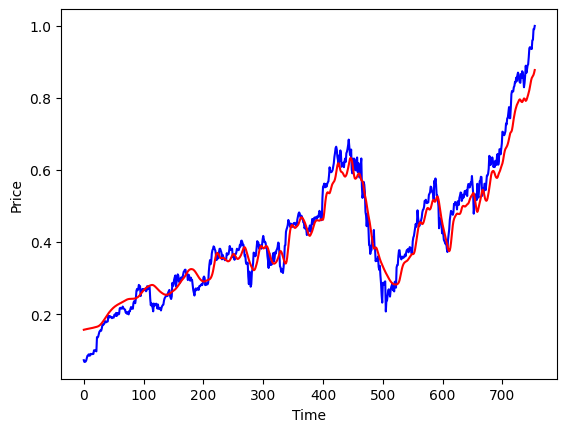

In [62]:
plt.plot(y_test,'b',label = 'original price')
plt.plot(y_predict,'r',label = 'predicted price')
plt.xlabel('Time')  
plt.ylabel('Price')

In [71]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_test, y_predict)
print(f'Mean Absolute Error: {mae:.4f}')

Mean Absolute Error: 0.0339


In [72]:
mse = mean_squared_error(y_test, y_predict)
print(f'Mean Squared Error: {mse:.4f}')

Mean Squared Error: 0.0018
